In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [3]:
path=source_file
train_df=pd.read_csv(path)
print(train_df.head(),'\n',train_df.shape)

   compositeHourlyWages  age  yearsEducation  sex1M0F
0                 21.38   58              10        1
1                 25.15   42              16        1
2                  8.57   31              12        0
3                 12.07   43              13        0
4                 10.97   46              12        0 
 (3197, 4)


In [4]:
train_x=train_df.drop(['compositeHourlyWages'],axis=1)
train_x.head()

,age,yearsEducation,sex1M0F
0,58,10,1
1,42,16,1
2,31,12,0
3,43,13,0
4,46,12,0


In [5]:
train_y=train_df[['compositeHourlyWages']]
type(train_y)

pandas.core.frame.DataFrame

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# create the model
model=Sequential()
n_cols=train_x.shape[1]
model.add(Dense(10,activation='relu',input_shape=(n_cols,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))
# comile the mdoel
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_monitor=EarlyStopping(patience=8)
model.fit(train_x,train_y,validation_split=0.2,epochs=30,callbacks=[early_stopping_monitor],verbose=1)


Train on 2557 samples, validate on 640 samples
Epoch 1/30
2557/2557 [==============================] - 0s 42us/sample - loss: 41.1419 - accuracy: 0.0000e+00 - val_loss: 37.0346 - val_accuracy: 0.0000e+00
Epoch 2/30
2557/2557 [==============================] - 0s 43us/sample - loss: 40.9567 - accuracy: 0.0000e+00 - val_loss: 36.8873 - val_accuracy: 0.0000e+00
Epoch 3/30
2557/2557 [==============================] - 0s 43us/sample - loss: 41.0865 - accuracy: 0.0000e+00 - val_loss: 36.9573 - val_accuracy: 0.0000e+00
Epoch 4/30
2557/2557 [==============================] - 0s 42us/sample - loss: 40.8903 - accuracy: 0.0000e+00 - val_loss: 36.9615 - val_accuracy: 0.0000e+00
Epoch 5/30
2557/2557 [==============================] - 0s 41us/sample - loss: 40.8994 - accuracy: 0.0000e+00 - val_loss: 36.7368 - val_accuracy: 0.0000e+00
Epoch 6/30
2557/2557 [==============================] - 0s 42us/sample - loss: 40.8301 - accuracy: 0.0000e+00 - val_loss: 36.9893 - val_accuracy: 0.0000e+00
Epoch 7/30


In [44]:
test_path=path=r'C:\Users\Abhishek\Desktop\data_file\csv_file\Income_testing.csv'
test_df=pd.read_csv(test_path)
test_x=test_df.drop(columns='ID')

In [43]:
predict_y=model.predict(test_x,verbose=0)
print(test_x.join(pd.DataFrame(predict_y,columns=['compositeHourlyWages'])))

     age  yearsEducation  sex1M0F  compositeHourlyWages
0     36              20        0             19.047880
1     38              17        0             19.382895
2     24              10        0             11.313522
3     39              12        1             19.040461
4     50              12        0             15.447387
..   ...             ...      ...                   ...
795   30              10        0             11.774680
796   47              10        0             13.059997
797   47              13        0             16.300856
798   65               6        0             10.099769
799   35              13        1             18.638594

[800 rows x 4 columns]


In [10]:
pip install livelossplot

Note: you may need to restart the kernel to use updated packages.


## Increasing model capacity

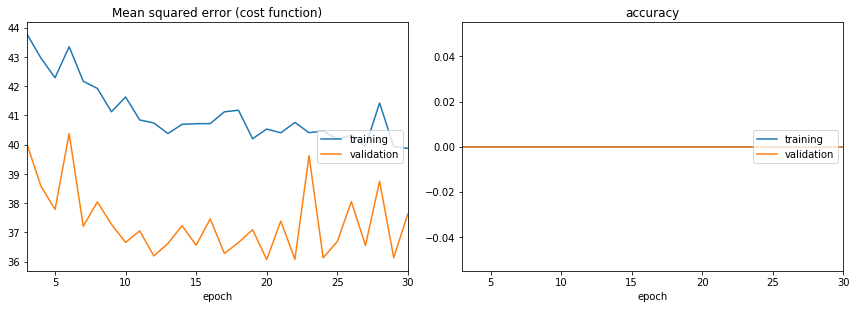

Mean squared error (cost function):
training   (min:   39.873, max:   71.150, cur:   39.873)
validation (min:   36.072, max:   41.939, cur:   37.632)

accuracy:
training   (min:    0.000, max:    0.000, cur:    0.000)
validation (min:    0.000, max:    0.000, cur:    0.000)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# create the model
new_model=Sequential()
n_cols=train_x.shape[1]
new_model.add(Dense(100,activation='relu',input_shape=(n_cols,)))
new_model.add(Dense(100,activation='relu'))
new_model.add(Dense(100,activation='relu'))
new_model.add(Dense(1))
# comile the mdoel
new_model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

from livelossplot.tf_keras import PlotLossesCallback
new_model.fit(train_x,
              train_y,
              validation_split=0.2,
              epochs=30,
              callbacks=[PlotLossesCallback()],
              verbose=0)